# Linear Regression

To exhibit linear regression we will be using the famous Boston House Prices data set

In [53]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [19]:
# Get the data
file_path = "https://raw.githubusercontent.com/AJCoca/SLP19/master/"
file_name = "housing.csv"

housing = pd.read_csv(file_path + file_name)

housing.head() # Check data is imported

,medv,crim,nox,rm,age,ptratio
0,24.0,0.00632,0.538,6.575,65.2,15.3
1,21.6,0.02731,0.469,6.421,78.9,17.8
2,34.7,0.02729,0.469,7.185,61.1,17.8
3,33.4,0.03237,0.458,6.998,45.8,18.7
4,36.2,0.06905,0.458,7.147,54.2,18.7


## Exploratory Data Analysis

The first thing to do with any data set is to describe it, this helps us to determine if there are any missing values or if the ranges of variables are not similar, in which case they require normalisation.

In [21]:
print(housing.describe())

medv        crim         nox          rm         age    ptratio
count  100.00000  100.000000  100.000000  100.000000  100.000000  100.00000
mean    22.30900    0.283301    0.471321    6.234410   56.252000   18.69000
std      5.92797    0.389102    0.046836    0.490838   27.476787    1.69893
min     12.70000    0.006320    0.398000    5.399000    2.900000   15.10000
25%     18.90000    0.050395    0.437000    5.926250   35.225000   17.90000
50%     21.50000    0.102405    0.453000    6.130500   57.300000   18.70000
75%     24.70000    0.221050    0.524000    6.433000   81.775000   19.70000
max     43.80000    1.612820    0.538000    8.069000  100.000000   21.10000


We can see that the counts for all of the variables are fine and so we don't need to worry about misssing values. The minimum and maximum ranges also seem to be appropriate, but we can see that the ranges that different covariates have vary and so to help us gain intuition from the coefficients fitted by a linear model it will be a good idea to normalise our data. First lets get some more information from pairwise correlation and scatter plots.

medv      crim       nox        rm       age   ptratio
medv     1.000000 -0.566412 -0.479744  0.846507 -0.480581 -0.350806
crim    -0.566412  1.000000  0.728919 -0.351390  0.529749  0.673495
nox     -0.479744  0.728919  1.000000 -0.299431  0.680015  0.342822
rm       0.846507 -0.351390 -0.299431  1.000000 -0.153987 -0.235074
age     -0.480581  0.529749  0.680015 -0.153987  1.000000  0.218177
ptratio -0.350806  0.673495  0.342822 -0.235074  0.218177  1.000000


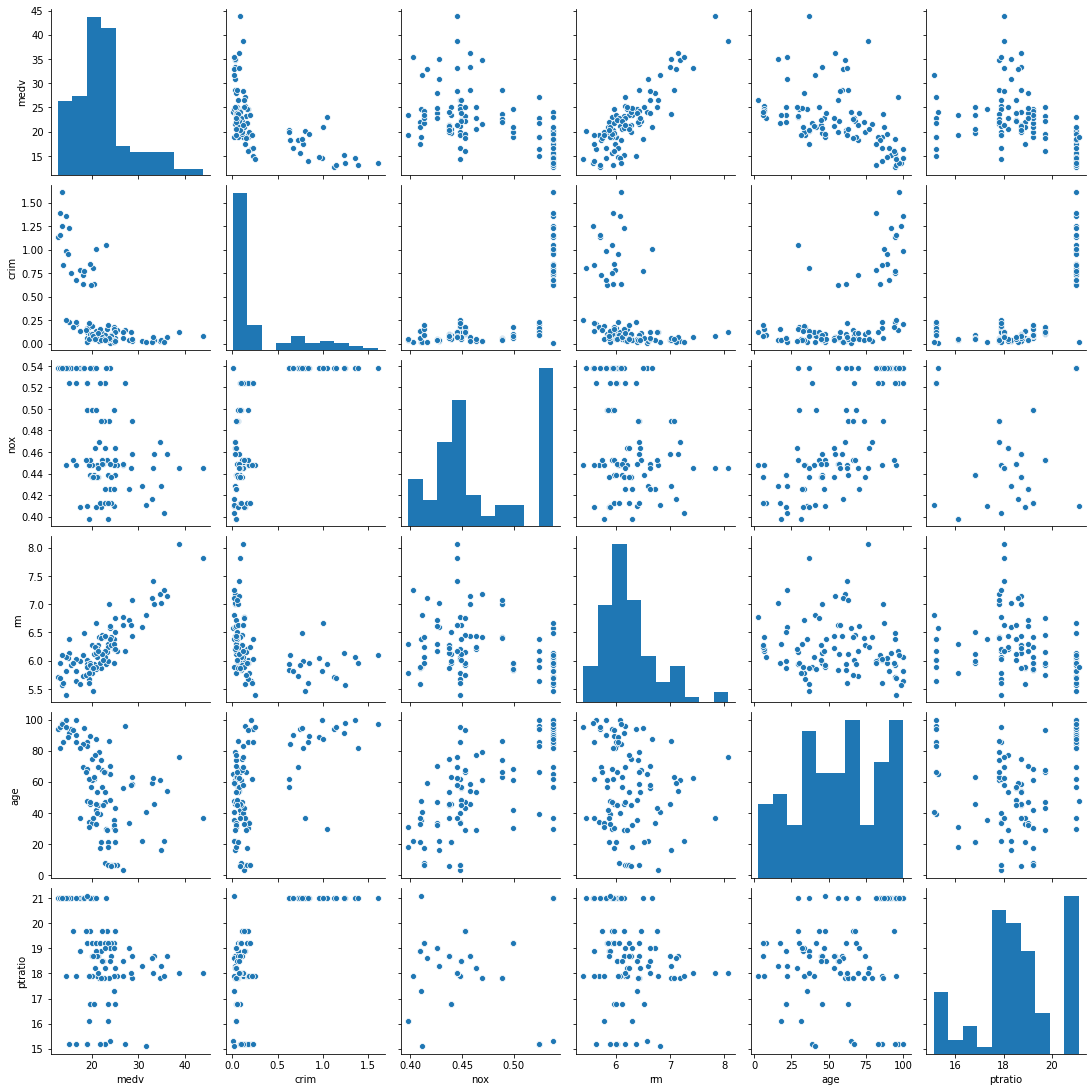

In [24]:
print(housing.corr())
sns.pairplot(housing)

We can see that some of the covariates are strongly correlated with oneanother, this will affect the interpretations of the linear model we fit to the data. Let's see what we get if we fit the linear model against all covariates:

In [58]:
labels = housing['medv']
covariates = housing.drop(['medv'], axis = 1)

X = sm.add_constant(covariates)
Y = labels
model = sm.OLS(Y, X).fit()

y_hat = model.predict(X)

print(model.summary())


OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     119.7
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           3.55e-39
Time:                        11:05:29   Log-Likelihood:                -219.52
No. Observations:                 100   AIC:                             451.0
Df Residuals:                      94   BIC:                             466.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.6431      6.460     -5.982      0.000     -51.469     -25.817
c

Now, to test your understanding of how these coefficients are fit, we will calculate them 'by hand' and see if we can get the same values.




In [66]:
X_vals = X.values
Y_vals = Y.values
beta_hat = np.dot(np.linalg.inv(np.dot(np.transpose(X_vals),X_vals)), np.dot(np.transpose(X_vals), Y_vals))
y_hat = np.dot(X_vals, beta_hat)
RSS = np.linalg.norm(y - y_hat, ord= 2) ** 2
sigmahat = np.sqrt(RSS/(len(Y_vals) - len(beta_hat)))
standard_errors = np.sqrt(np.diagonal(np.linalg.inv(np.dot(np.transpose(X_vals), X)))) * sigmahat
print("beta hat: " + str(beta_hat))
print("standard errors: " + str(standard_errors) )

beta hat: [-3.86430784e+01 -3.46733175e+00  1.82344104e+01  9.15886394e+00
 -7.39002578e-02  2.12434478e-02]
standard errors: [6.45996441 1.14408122 8.38545122 0.49327142 0.01129437 0.18835992]


This gives us the results that we expect.

### How do we interpret the coefficients?

We can interpret the coefficients of, say *rm*, as if we controlled all other covariates, an increase in the average number of rooms per dwelling in a region by 1 would increase the median house valuation by 9160USD. This is different from if we just fit a linear model against *rm* in which case the coefficient would correspond to the marginal increase (i.e not controlling all other covariates).

### What is the meaning of the residual standard error?

The residual standard error is the estimate $\hat{\sigma}$ for the error term $\epsilon$.

### What is the meaning of the R-squared?

The multiple R-squared value tells us that 86.4% of the variability in the data can be explained by the covariates included in the linear model. It can be computed by:
$$1 - \frac{RSS}{TSS}$$ where RSS is the sum of residual squares for the fitted linear model and TSS is the sum of residual squares for the intercept only model.

### What is the meaning of the F-statistic?

This tests the intercept only null model that there is no difference in house prices across the regions against the fitted linear model. The F-statistic is calculated using:

$$F = \frac{(RSS - TSS)/p}{RSS/(N-p-1)}$$

To obtain a value of TSS we could run the regression using an intercept only model, alternatively since we have been given the value of R-squared we can calculate that:

$$R^2 = 1 - \frac{RSS}{TSS} \implies TSS = \frac{RSS}{1 - R^2}$$

So we have that:

$$F = \frac{1}{}$$
